In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [4]:
data.drop('Cabin', axis=1, inplace=True)

In [5]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [7]:
numeric_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
correlation_matrix = data[numeric_columns].corr()

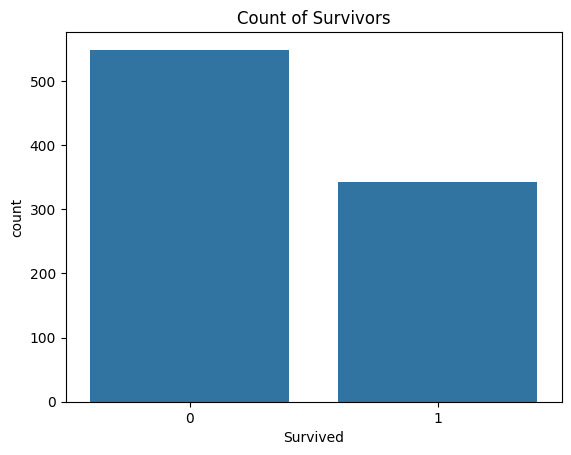

In [8]:
# EDA - Exploratory Data Analysis

# Countplot of survivors

sns.countplot(data=data, x='Survived')
plt.title("Count of Survivors")
plt.show()

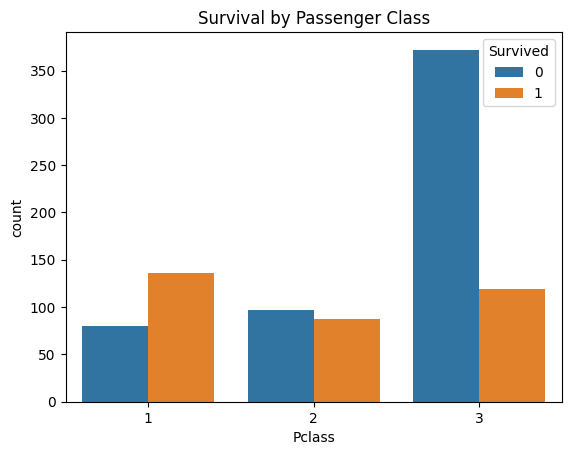

In [9]:
# Relationship between Pclass and Survival
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

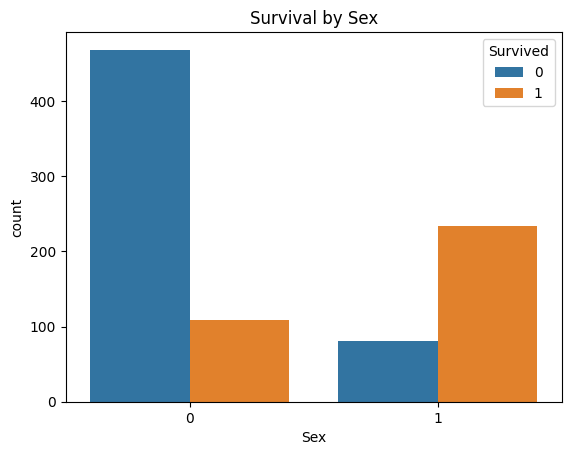

In [10]:
# Relationship between Sex and Survival
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

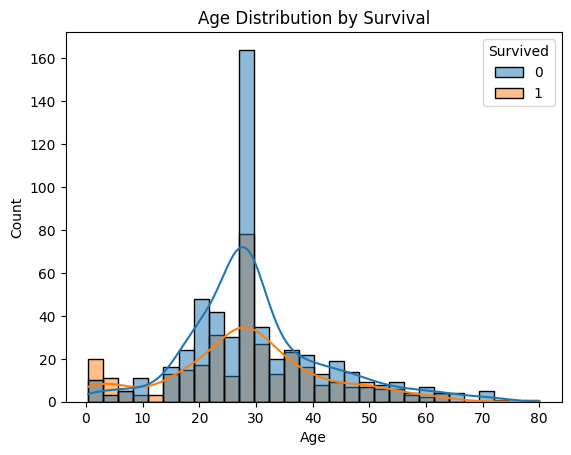

In [11]:
# 3. Relationship between 'Age' and 'Survived'
sns.histplot(data=data, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

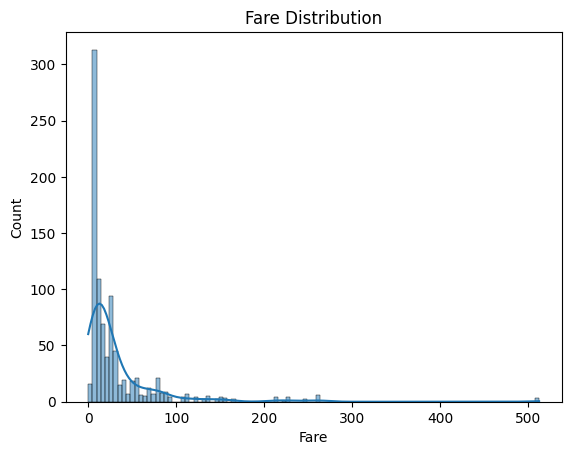

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [12]:
# Fare distribution
sns.histplot(data=data, x='Fare', kde=True)
plt.title("Fare Distribution")
plt.show()
plt.tight_layout

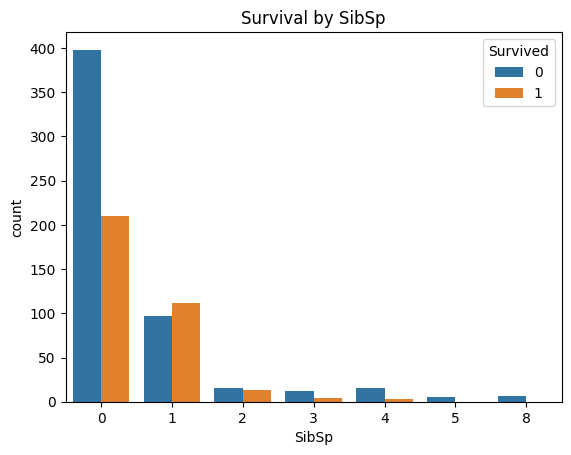

In [13]:
# Relationship between SibSp (Number of Siblings/Spouses) and Survival
sns.countplot(data=data, x='SibSp', hue='Survived')
plt.title("Survival by SibSp")
plt.show()

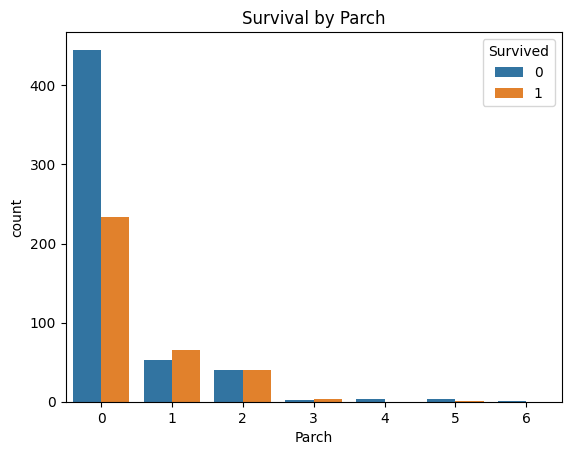

In [14]:
# Relationship between Parch (Number of Parents/Children) and Survival
sns.countplot(data=data, x='Parch', hue='Survived')
plt.title("Survival by Parch")
plt.show()

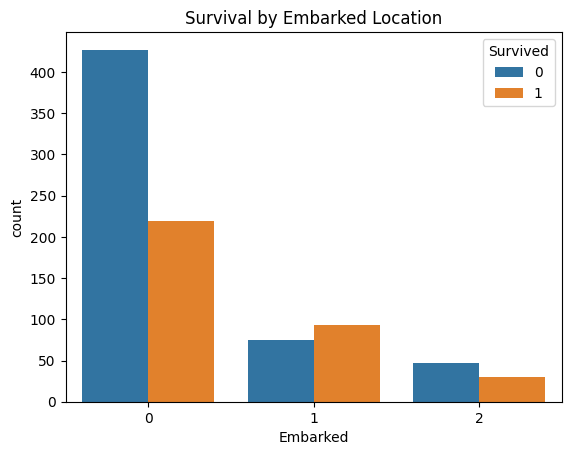

In [15]:
# Embarked location and Survival
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.title("Survival by Embarked Location")
plt.show()

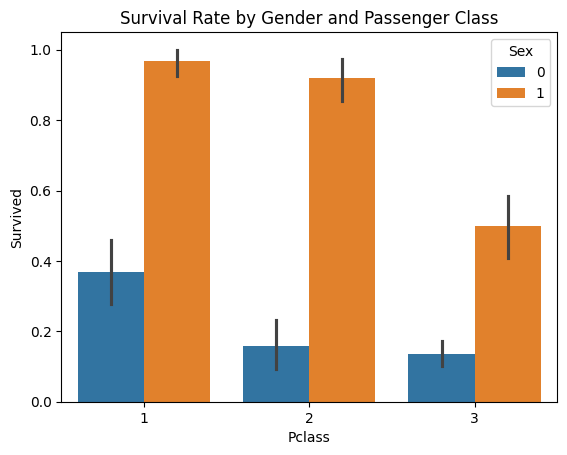

In [16]:
# 9. Survival Rate by Gender and Class
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

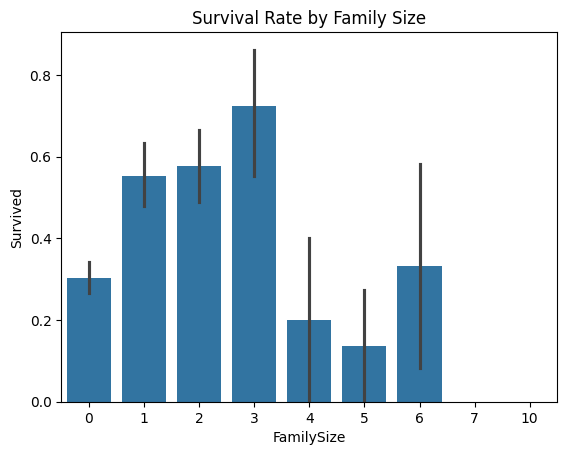

In [17]:
# 10. Family Size vs. Survival
data['FamilySize'] = data['SibSp'] + data['Parch']
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title('Survival Rate by Family Size')
plt.show()

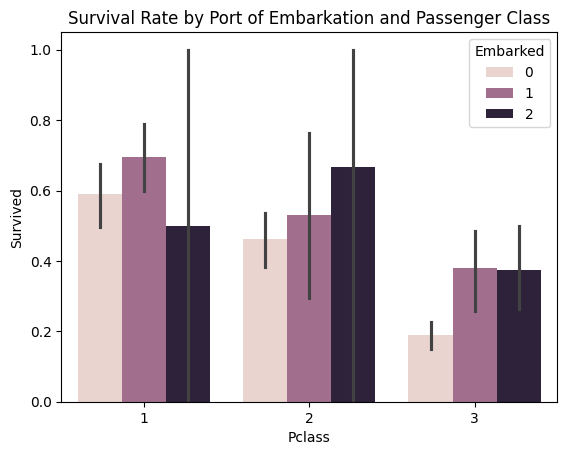

In [18]:
# 11. Survival Rate by Embarked and Class
sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=data)
plt.title('Survival Rate by Port of Embarkation and Passenger Class')
plt.show()

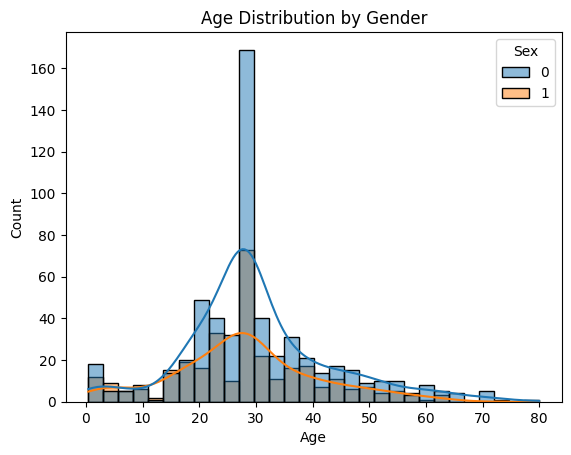

In [19]:
# 12. Age Distribution by Gender
sns.histplot(data=data, x='Age', hue='Sex', kde=True)
plt.title('Age Distribution by Gender')
plt.show()


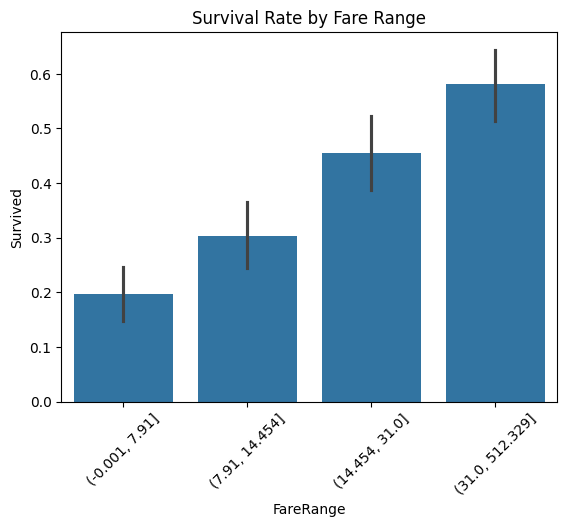

In [20]:
# 13. Survival Rate by Fare Range
data['FareRange'] = pd.qcut(data['Fare'], q=4)
sns.barplot(x='FareRange', y='Survived', data=data)
plt.title('Survival Rate by Fare Range')
plt.xticks(rotation=45)
plt.show()

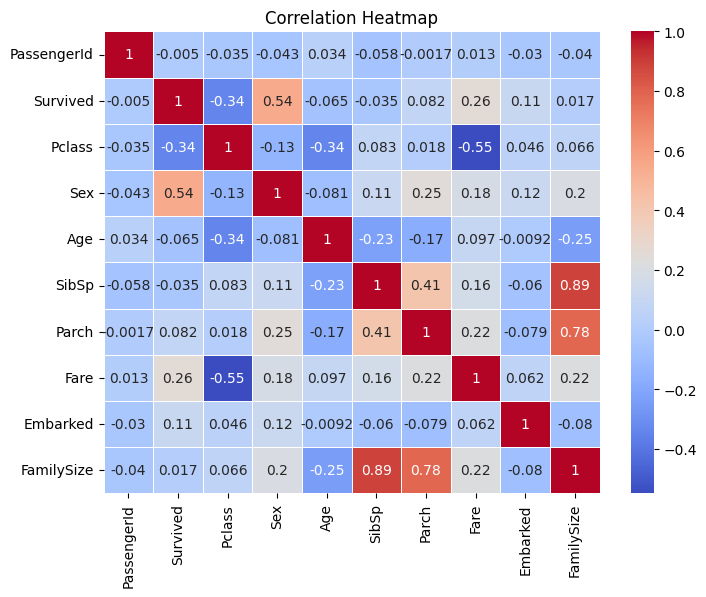

In [21]:
numerical_columns = data.select_dtypes(include=[np.number])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()